# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     ------------- ------------------------ 245.8/675.6 kB 7.6 MB/s eta 0:00:01
     ------------------------------------- 675.6/675.6 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=dc013fb63319be18b7d0dcec7d87fa58d6bd5105f589fa1e94747a2153a34d0a
  Stored in directory: c:\users\rania\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [5]:
cities

['adamstown',
 'hihifo',
 'tralee',
 'port-aux-francais',
 'bathsheba',
 'quesnel',
 'taro',
 'edinburgh of the seven seas',
 'i-n-salah',
 'talnakh',
 'georgetown',
 'puerto natales',
 'pangody',
 'siirt',
 'waitangi',
 'blackmans bay',
 'arica',
 'longyearbyen',
 'basoko',
 'khandyga',
 'bethel',
 'illela',
 'betio village',
 'atafu village',
 'targuist',
 'isafjordur',
 'garissa',
 'bredasdorp',
 'taoudenni',
 'karratha',
 'kontagora',
 'hamilton',
 'arvayheer',
 'uturoa',
 'bilibino',
 'fortuna',
 'margate',
 'yellowknife',
 'cockburn town',
 'iskateley',
 'smithers',
 'kapuskasing',
 "tobol'sk",
 'ushuaia',
 'natal',
 'yeraliyev',
 'madalena',
 'opuwo',
 'vorgashor',
 'tobi village',
 'richards bay',
 'stanley',
 'daru',
 'gallivare',
 'rupert',
 'mendoza',
 'ancud',
 'berezovyy',
 'bedesa',
 'haiku-pauwela',
 'margaret river',
 'puerto ayora',
 'saint-germain-en-laye',
 'college',
 'utrik',
 'laikit, laikit ii (dimembe)',
 'grytviken',
 'cabedelo',
 'kralendijk',
 'cargados caraj

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=ba39d789747343a52d08560edaaf78df&q=san francisco


In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []
print(city_data)
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

[]
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | hihifo
City not found. Skipping...
Processing Record 3 of Set 1 | tralee
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | quesnel
Processing Record 7 of Set 1 | taro
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | i-n-salah
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | pangody
Processing Record 14 of Set 1 | siirt
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | arica
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | basoko
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | bogra
Processing Record 39 of Set 4 | surin
Processing Record 40 of Set 4 | parabel'
Processing Record 41 of Set 4 | sosnovo-ozerskoye
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | papatowai
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 4 | berbera
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | lihue
Processing Record 0 of Set 5 | saint croix
Processing Record 1 of Set 5 | vicam
Processing Record 2 of Set 5 | mingora
Processing Record 3 of Set 5 | mandera
Processing Record 4 of Set 5 | hadibu
Processing Record 5 of Set 5 | thinadhoo
Processing Record 6 of Set 5 | yagry
City not found. Skipping...
Processing Record 7 of Set 5 | homer
Processing Record 8 of Set 5 | garhdiwala
Processing Record 9 of Set 5 | la passe
Processing Record 10 of Set 5 | gassol
Processing Record 11 of

City not found. Skipping...
Processing Record 32 of Set 8 | santarem
Processing Record 33 of Set 8 | maua
Processing Record 34 of Set 8 | mejit
Processing Record 35 of Set 8 | labrador city
Processing Record 36 of Set 8 | saacow
Processing Record 37 of Set 8 | ad dabbah
Processing Record 38 of Set 8 | rabo de peixe
Processing Record 39 of Set 8 | ayr
Processing Record 40 of Set 8 | constantia
Processing Record 41 of Set 8 | saint-pierre
Processing Record 42 of Set 8 | kangding
Processing Record 43 of Set 8 | tvoroyri
Processing Record 44 of Set 8 | knokke
Processing Record 45 of Set 8 | rouissat
Processing Record 46 of Set 8 | coquimbo
Processing Record 47 of Set 8 | yuzhno-kurilsk
Processing Record 48 of Set 8 | dothan
Processing Record 49 of Set 8 | badger
Processing Record 0 of Set 9 | lagrange
Processing Record 1 of Set 9 | cueibet
City not found. Skipping...
Processing Record 2 of Set 9 | porto novo
Processing Record 3 of Set 9 | aksakovo
Processing Record 4 of Set 9 | muzayri'
Ci

Processing Record 20 of Set 12 | argo
Processing Record 21 of Set 12 | guerrero negro
Processing Record 22 of Set 12 | firuzabad
Processing Record 23 of Set 12 | tibanbang
Processing Record 24 of Set 12 | alo
Processing Record 25 of Set 12 | tanrake village
City not found. Skipping...
Processing Record 26 of Set 12 | lucas
Processing Record 27 of Set 12 | geroskipou
City not found. Skipping...
Processing Record 28 of Set 12 | pocahontas
Processing Record 29 of Set 12 | bolvadin
Processing Record 30 of Set 12 | dolores
Processing Record 31 of Set 12 | doka
Processing Record 32 of Set 12 | sanliurfa
Processing Record 33 of Set 12 | stornoway
Processing Record 34 of Set 12 | sao gabriel da cachoeira
Processing Record 35 of Set 12 | idri
Processing Record 36 of Set 12 | grimstad
Processing Record 37 of Set 12 | aral
Processing Record 38 of Set 12 | vila real de santo antonio
Processing Record 39 of Set 12 | tupiza
Processing Record 40 of Set 12 | yylanly
City not found. Skipping...
Process

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,18.86,74,100,9.14,PN,1694911475
1,tralee,52.2704,-9.7026,12.04,91,100,2.21,IE,1694911476
2,port-aux-francais,-49.3500,70.2167,5.70,96,100,15.29,TF,1694911476
3,bathsheba,13.2167,-59.5167,28.34,78,20,1.03,BB,1694911477
4,quesnel,52.9999,-122.5029,18.28,63,0,0.00,CA,1694911209


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.86,74,100,9.14,PN,1694911475
1,tralee,52.2704,-9.7026,12.04,91,100,2.21,IE,1694911476
2,port-aux-francais,-49.3500,70.2167,5.70,96,100,15.29,TF,1694911476
3,bathsheba,13.2167,-59.5167,28.34,78,20,1.03,BB,1694911477
4,quesnel,52.9999,-122.5029,18.28,63,0,0.00,CA,1694911209


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [23]:
(time.strftime("%y-%m-%d"))

'23-09-16'

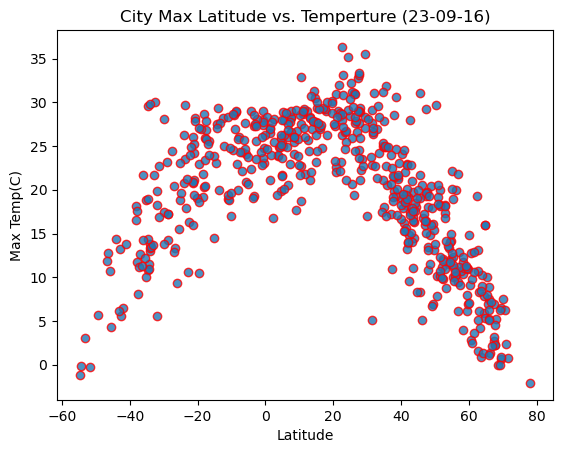

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    
)

# Incorporate the other graph properties
date = (time.strftime("%y-%m-%d"))
plt.title(f"City Max Latitude vs. Temperture ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

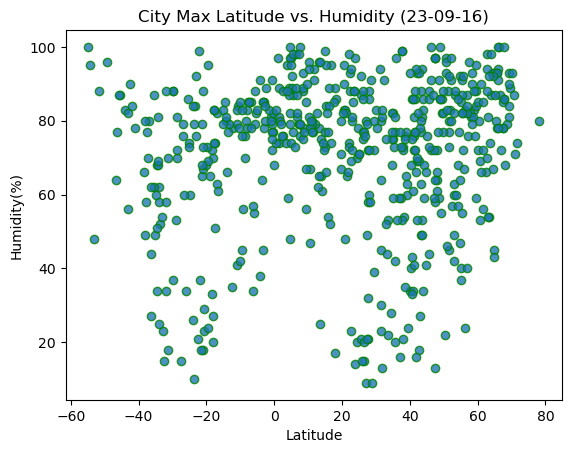

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    
)

# Incorporate the other graph properties
date = (time.strftime("%y-%m-%d"))
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

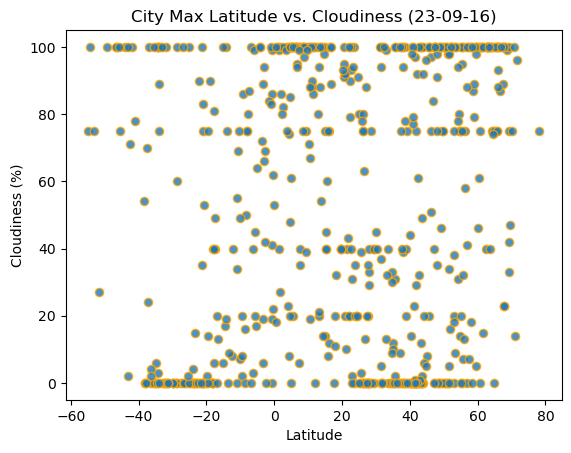

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    
)

# Incorporate the other graph properties
date = (time.strftime("%y-%m-%d"))
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

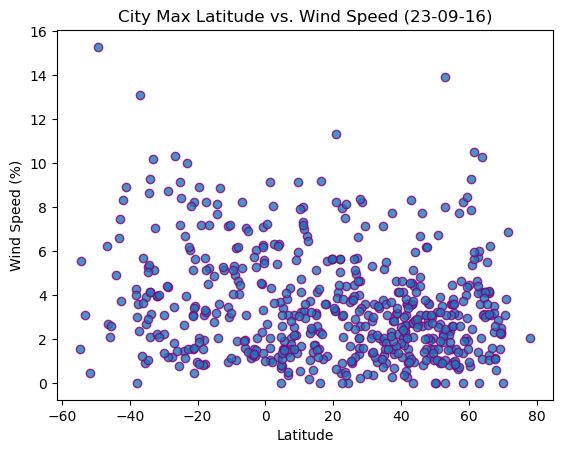

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    
)
# Incorporate the other graph properties
date = (time.strftime("%y-%m-%d"))
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text, text_coord):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stdrr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
    

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tralee,52.2704,-9.7026,12.04,91,100,2.21,IE,1694911476
3,bathsheba,13.2167,-59.5167,28.34,78,20,1.03,BB,1694911477
4,quesnel,52.9999,-122.5029,18.28,63,0,0.00,CA,1694911209
7,i-n-salah,27.1935,2.4607,32.84,9,0,6.62,DZ,1694911478
8,talnakh,69.4865,88.3972,0.67,89,47,2.30,RU,1694911479


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.86,74,100,9.14,PN,1694911475
2,port-aux-francais,-49.3500,70.2167,5.70,96,100,15.29,TF,1694911476
5,taro,-8.3862,115.2800,23.00,80,50,1.89,ID,1694911478
6,edinburgh of the seven seas,-37.0676,-12.3116,12.64,80,100,13.09,SH,1694911478
10,puerto natales,-51.7236,-72.4875,-0.25,88,27,0.46,CL,1694911480


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6462163077969114


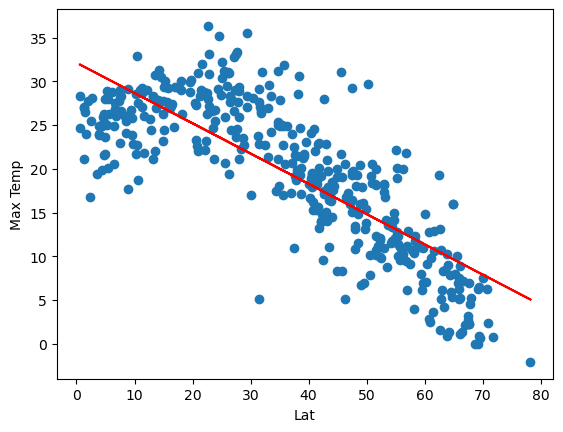

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", "Correlation: 0.95", (6, -10,))

The r-value is 0.5429431227292758


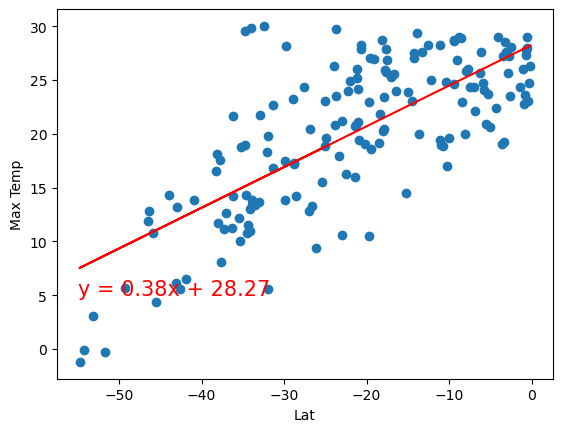

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", "Correlation: 0.95", (-55, 5))

**Discussion about the linear relationship: The Southern Hemisphere we see that the max temp starts from 5-6, while the Northern Hemisphere starts between 30-35 and takes a spike downwards of a latitude of 80.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 2.9140405818738537e-05


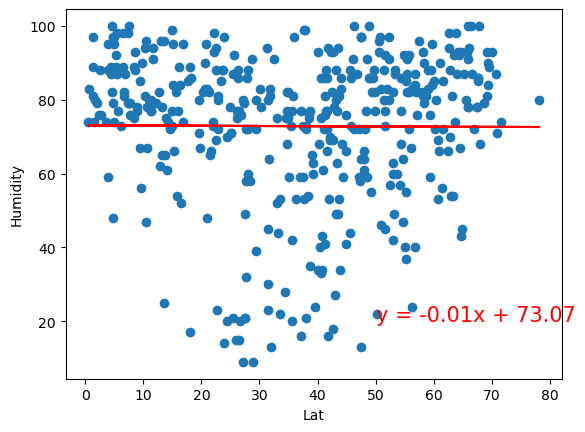

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", "Correlation: 0.95", (50, 20))

The r-value is 0.012478628538846783


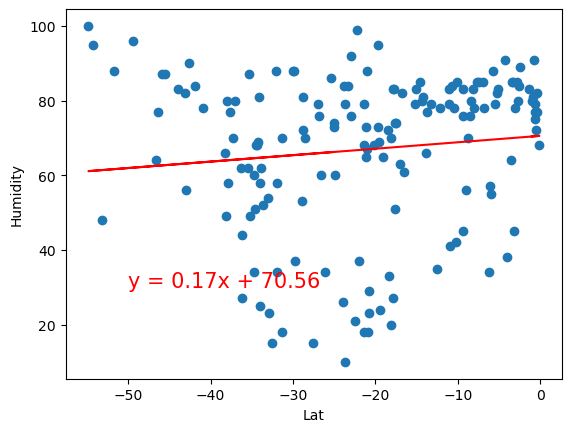

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", "Correlation: 0.95", (-50, 30))

**Discussion about the linear relationship:** The Humidity between the graphs above represent the changes in the humidity on the Southeren Hemisphere and the Northern Hemisphere. Although, the humidity levels seem to be more similar then the Max Temp charts.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0003106300607635929


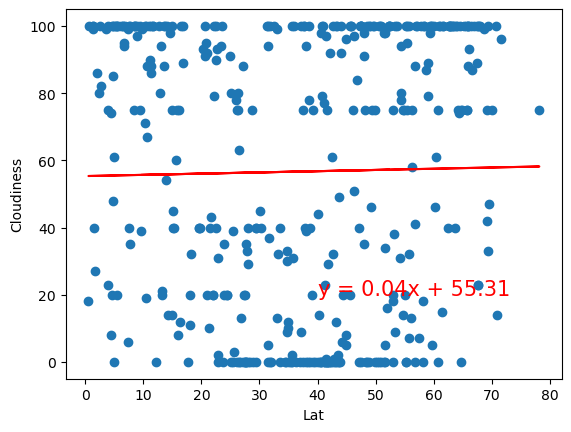

In [48]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"] 
plot_linear_regression(x_values, y_values, "Cloudiness", "Correlation: 0.95", (40, 20))

The r-value is 0.0008077486414662697


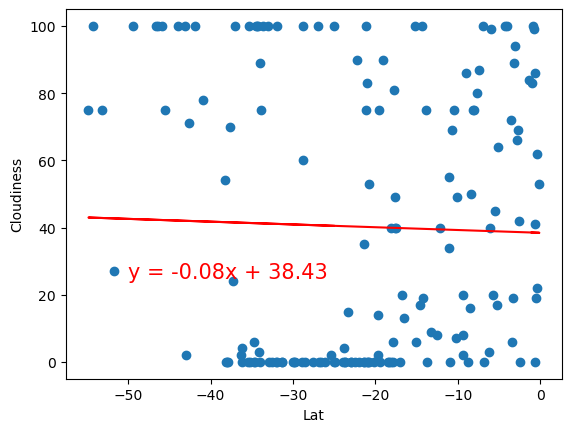

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", "Correlation: 0.95", (-50, 25))

**Discussion about the linear relationship:**  The linear relationship here is the southern hemisphere has the cloudiness equation at y= -0.08x + 38.43, which is in the negatives while the northern hemisphere has a positive equation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.00108641640239759


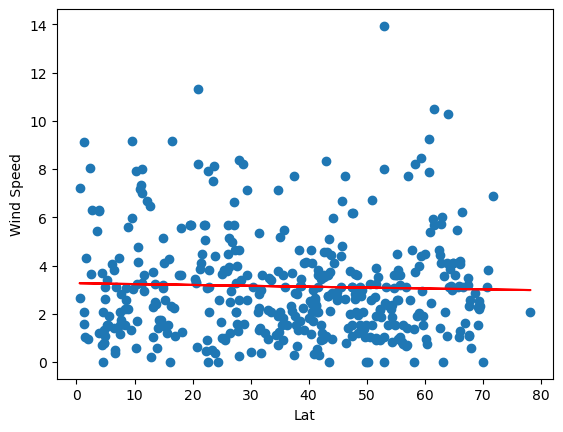

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", "Correlation: 0.95", (10, 15))

The r-value is: 0.062239040700515696


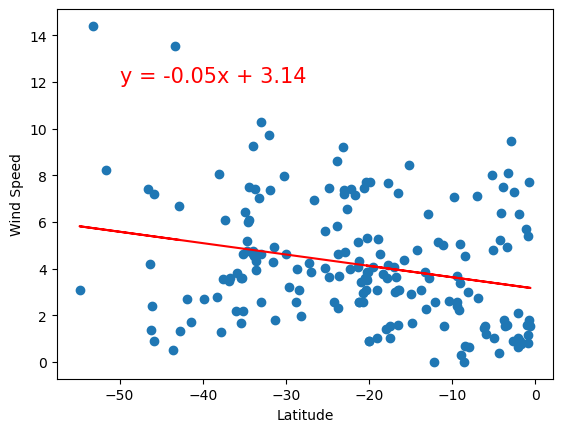

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", "Correlation: 0.95", (-50, 10))

**Discussion about the linear relationship:** The linear relationship in these graphs is quite intresting because the Southern hemiphere graph shows the little dots a little more scattered than the northern hemiphere graph. The northern hemisphere graph illistrates alot of over lapping between the dots to show the wind speed and the different latitudes.